In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
from scipy import signal

In [3]:
raw_data=pd.read_csv('raw_data/20190214/piclean_3h.dat', delimiter=',', header=None)
ts=pd.Series(list(raw_data[1]), pd.to_datetime(raw_data[0], unit='ms', utc=True).dt.tz_convert('US/Eastern'))

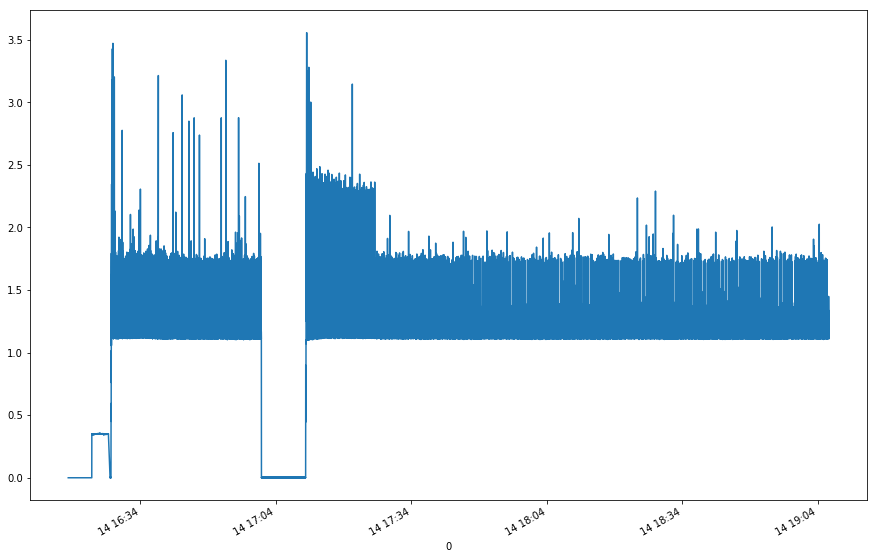

In [26]:
seg=(ts)
seg.plot(figsize = (15, 10))

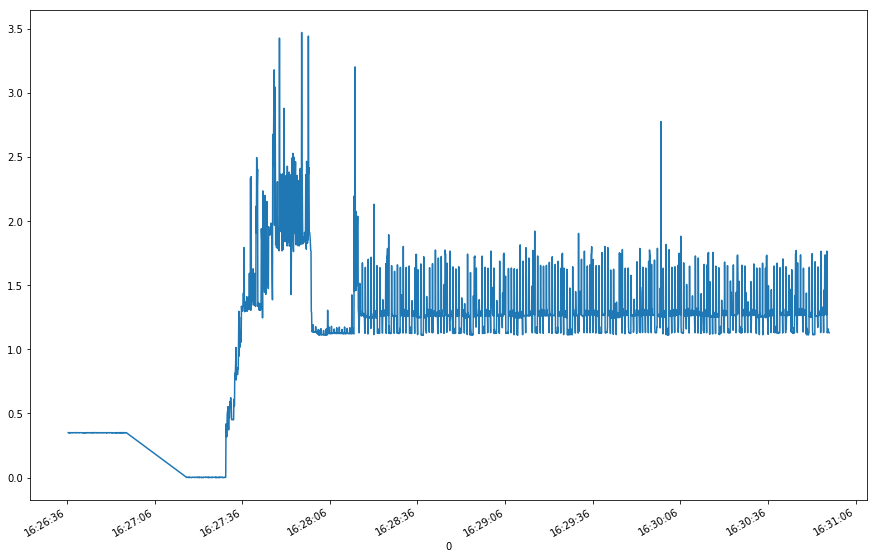

In [19]:
seg=(ts[3600:6000])
seg.plot(figsize = (15, 10))

In [ ]:
seg=(ts[5000:6000])
fss = 10.0  # Sample frequency (Hz)
f0 = 1.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
# Design notch filter
b, a = signal.iirnotch(f0, Q)
# Frequency response
fil_seg = signal.lfilter(b, a, seg)
fil_seg = pd.Series(fil_seg, seg.index)
fil_seg.plot()

(0, 60)

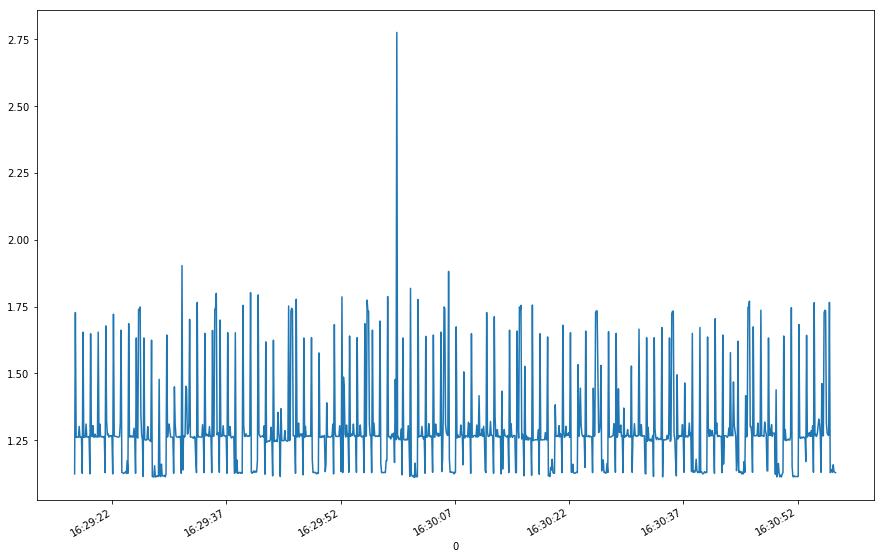

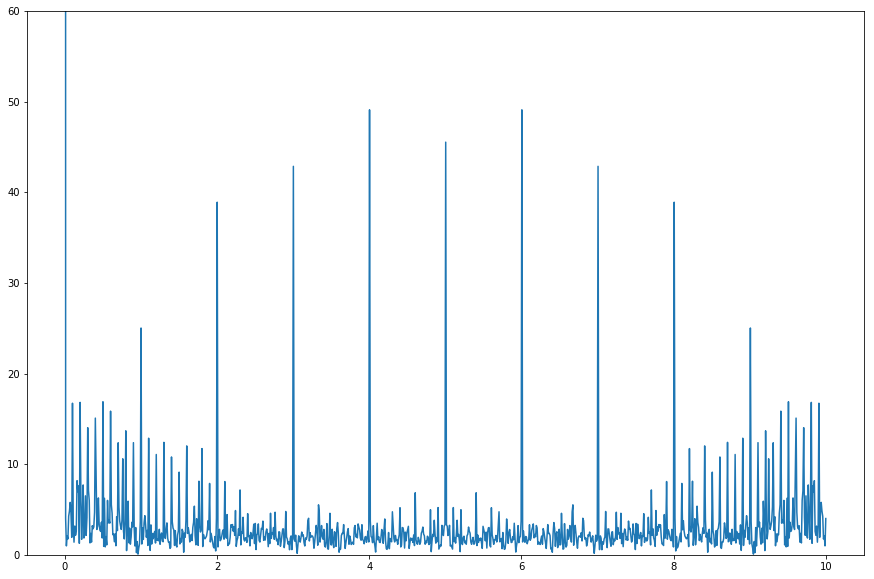

In [56]:
seg=(ts[5000:6000])
seg.plot(figsize = (15, 10))
fft_seg=np.abs(np.fft.fft(seg))
plt.figure(figsize=(15,10))
plt.plot(np.linspace(0,10,len(fft_seg)), fft_seg[0:len(fft_seg)])
axes = plt.gca()
axes.set_ylim([0,60])

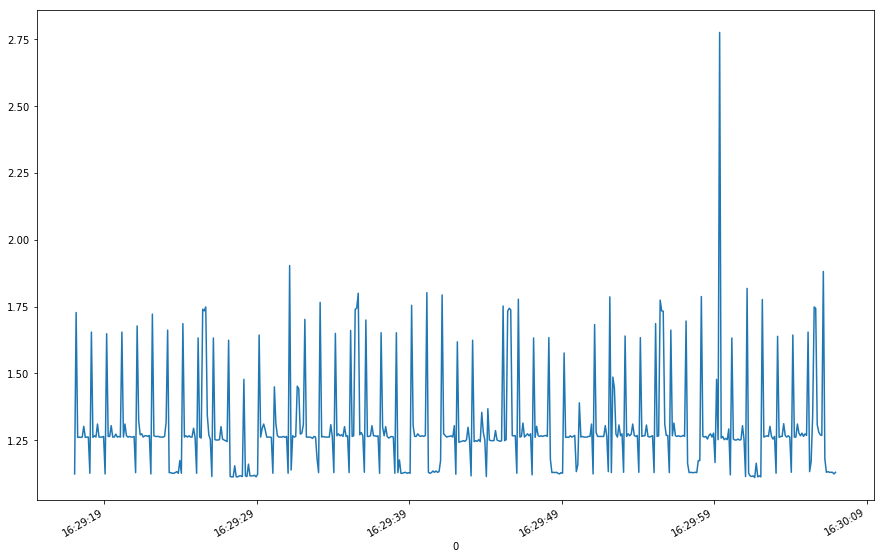

In [33]:
seg=(ts[5000:5500])
seg.plot(figsize = (15, 10))

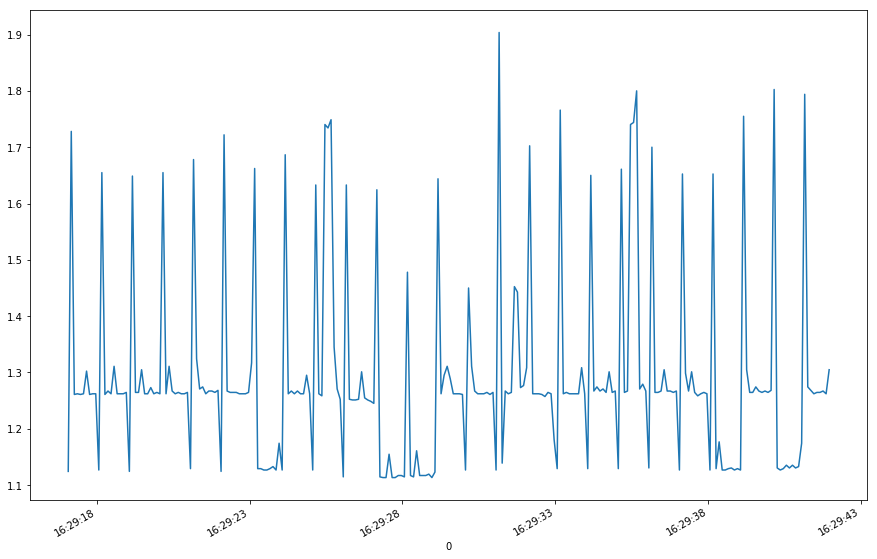

In [36]:
seg=(ts[5000:5250])
seg.plot(figsize = (15, 10))

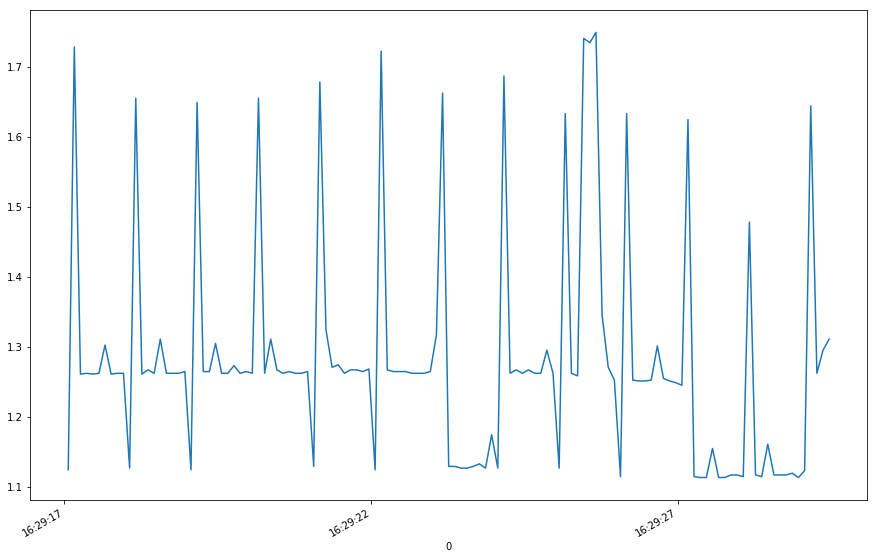

In [31]:
seg=(ts[5000:5125])
seg.plot(figsize = (15, 10))

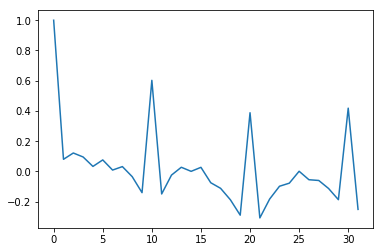

In [32]:
autocorr = acf(seg, nlags=int(len(seg)/4))
plt.plot(autocorr)

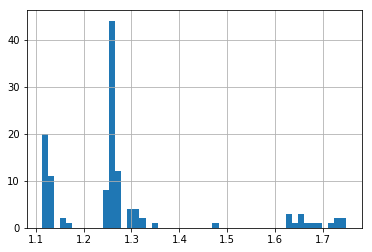

In [33]:
seg.clip(lower=0,upper=2).hist(bins=50)

In [34]:
# fit model
model = ARIMA(seg, order=(11,0,2))
model_fit = model.fit(disp=0)

/Users/luozhiwei/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [55]:
for p in [9, 10, 11, 12]:
    for q in [0, 1, 2]:
        model = ARIMA(seg.values, order=(p,0,q))
        model_fit = model.fit(disp=0)
        print "ARMA(%d, %d), AIC = %f, BIC = %f" % (p, q, model_fit.aic, model_fit.bic)

ARMA(9, 0), AIC = -83.970349, BIC = -52.858898


/Users/luozhiwei/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(9, 1), AIC = -78.502120, BIC = -44.562355
ARMA(9, 2), AIC = -174.748004, BIC = -137.979925
ARMA(10, 0), AIC = -164.522408, BIC = -130.582643
ARMA(10, 1), AIC = -196.189741, BIC = -159.421662
ARMA(10, 2), AIC = -212.750211, BIC = -173.153819
ARMA(11, 0), AIC = -214.427495, BIC = -177.659416
ARMA(11, 1), AIC = -212.999959, BIC = -173.403566
ARMA(11, 2), AIC = -215.677052, BIC = -173.252346
ARMA(12, 0), AIC = -213.370685, BIC = -173.774292
ARMA(12, 1), AIC = -212.333822, BIC = -169.909116
ARMA(12, 2), AIC = -214.229931, BIC = -168.976911


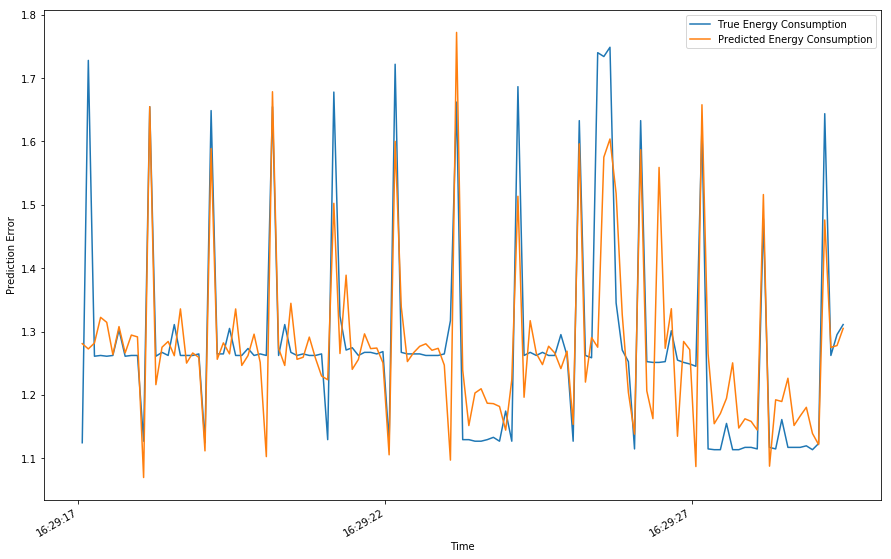

In [47]:
prediction = model_fit.predict()
seg.plot(figsize = (15, 10))
prediction.plot()
plt.xlabel('Time')
plt.ylabel('Prediction Error')
plt.legend(['True Energy Consumption', 'Predicted Energy Consumption'])

Text(0,0.5,'Prediction Error')

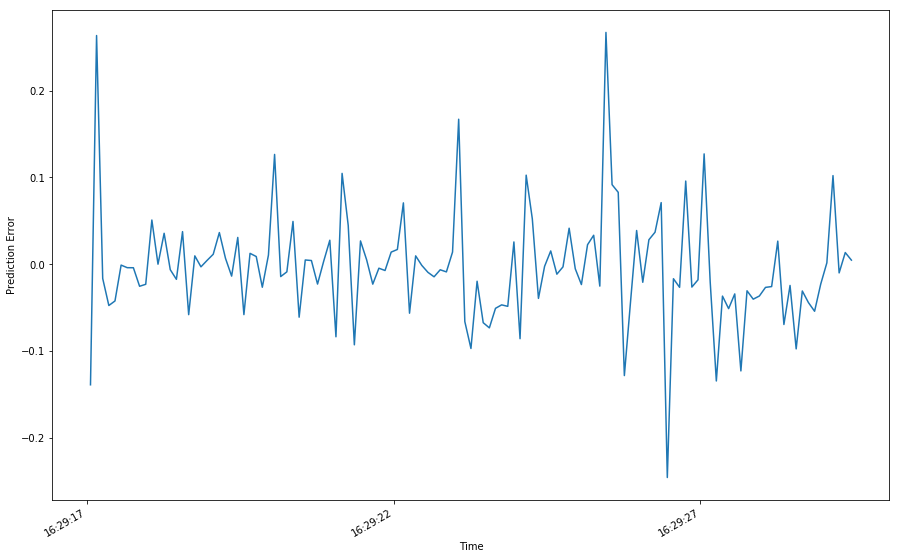

In [45]:
err=(seg-prediction)/seg
err.plot(figsize = (15, 10))
plt.xlabel('Time')
plt.ylabel('Prediction Error')

mean = -0.004219
skew = 0.819722
kurtosis = 4.900418


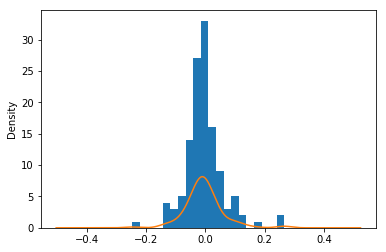

In [43]:
err.clip(lower=-0.5,upper=0.5).hist(bins=20)
err.plot(kind='kde')
print 'mean = %f' % err.mean()
print 'skew = %f' % err.skew()
print 'kurtosis = %f' % err.kurtosis()

In [41]:
print len(seg)

125
